In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import wrds
import pandas_datareader.data as web

In [3]:
conn = wrds.Connection()
sp500 = conn.raw_sql("""
                        select a.*, b.date, b.ret
                        from crsp.msp500list as a,
                        crsp.msf as b
                        where a.permno=b.permno
                        and b.date >= a.start and b.date<= a.ending
                        and b.date>='01/01/2000'
                        order by date;
                        """, date_cols=['start', 'ending', 'date'])

WRDS recommends setting up a .pgpass file.
Created .pgpass file successfully.
You can create this file yourself at any time with the create_pgpass_file() function.
Loading library list...
Done


In [4]:
sp500

,permno,start,ending,date,ret
0,77178,1999-07-22,2023-12-29,2000-01-31,-0.278921
1,48485,1976-07-01,2006-03-31,2000-01-31,-0.139194
2,19502,1979-10-11,2023-12-29,2000-01-31,-0.044872
3,28847,1986-12-18,2002-05-14,2000-01-31,-0.311891
4,56573,1986-02-13,2023-12-29,2000-01-31,-0.134135
...,...,...,...,...,...
144482,22111,1973-05-31,2023-12-29,2023-12-29,0.013449
144483,44206,2009-03-17,2023-12-29,2023-12-29,0.050244
144484,23473,1997-12-18,2023-12-29,2023-12-29,0.013815
144485,77274,2004-07-01,2023-12-29,2023-12-29,0.067363


In [ ]:
df1=ds[0].stack()
df2=ds[4].stack()
df3=ds[5].stack()
df1.name='returns'
df2.name='nfirms'
df3.name='size'
df = pd.concat([df1,df2,df3], axis=1)
df=df.reset_index()
df=df.set_index('Date')
df=(df).to_timestamp(how='E')
df.rename(columns={'level_1':'industry'},inplace=True)
df.index=df.index.date
df.index.name='Date'
df.to_csv('../../assets/data/49_Industry_Portfolios.csv')

### Application: Market model






In [ ]:
from datetime import datetime

# Create a date parser function that will allow pandas to read the dates in the format we have them
date_parser = lambda x: datetime.strptime(x, "%Y%m")
# our 50 stock returns data

url = "https://raw.githubusercontent.com/amoreira2/Fin418/main/assets/data/Retuns50stocks.csv"

# Use pd.read_csv with the date_parser
df  = pd.read_csv(url, parse_dates=['date'], date_parser=date_parser)
# Set the date column as the index

# first, create the DataFrame
df.set_index("date",inplace=True)
# put the returns in percentage format
df=df/100
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 180 entries, 2000-01-01 to 2014-12-01
Data columns (total 51 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CTL     180 non-null    float64
 1   T       180 non-null    float64
 2   CSCO    180 non-null    float64
 3   FCX     180 non-null    float64
 4   XL      180 non-null    float64
 5   IVZ     180 non-null    float64
 6   AMT     180 non-null    float64
 7   WHR     180 non-null    float64
 8   IR      180 non-null    float64
 9   WFT     180 non-null    float64
 10  YUM     180 non-null    float64
 11  CVS     180 non-null    float64
 12  GD      180 non-null    float64
 13  TYC     180 non-null    float64
 14  EL      180 non-null    float64
 15  MUR     180 non-null    float64
 16  CTAS    180 non-null    float64
 17  CBSA    180 non-null    float64
 18  SNV     180 non-null    float64
 19  CAM     180 non-null    float64
 20  DLTR    180 non-null    float64
 21  CAH     180 non-null

In [ ]:
# load regression library
import statsmodels.api as sm
# add a constant to the independent variable
x= sm.add_constant(df['Market'])
# set the dependent variable to be the 'CTL' return
y= df['CTL']
# run the regression
results= sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTL   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     36.81
Date:                Mon, 29 Jan 2024   Prob (F-statistic):           7.62e-09
Time:                        18:02:15   Log-Likelihood:                 214.56
No. Observations:                 180   AIC:                            -425.1
Df Residuals:                     178   BIC:                            -418.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0019      0.006      0.340      0.734      -0.009       0.013
Market         0.7269      0.120      6.068      0.000       0.491       0.963
==============================================================================
Omnibus:                       43.729   Durbin-Watson:                   2.264
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              394.038
Skew:                           0.524   Prob(JB):                     2.73e-86
Kurtosis:                      10.172   Cond. No.                         21.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interpretation:

The coefficient on the market estimates the exposure $b_{CTL}$. It is 0.72 and well estimate

- we see that the standard errors allow us to reject both zero (easy) and one (not as easy simnce the typical stock must have a beta of 1)

We see that the R-squared is 17% so the asset specific risk is sizable

* what fraction of CTL risk is due to the factor?

* how large is the non-factor component?


In [ ]:
# to get the residual volatility, we need to get the residuals and compute it's volatility
u= results.resid
print(u.std()*12**0.5)


0.25520301676928053


Lets now estimate the covariance matrix of these 50 stocks using this single-factor model

1. Run regression stock by stock
1. save betas, save residual variance
1. Use formula to construct variance matrix

In [ ]:
df.columns[:-1]

Index(['CTL', 'T', 'CSCO', 'FCX', 'XL', 'IVZ', 'AMT', 'WHR', 'IR', 'WFT',
       'YUM', 'CVS', 'GD', 'TYC', 'EL', 'MUR', 'CTAS', 'CBSA', 'SNV', 'CAM',
       'DLTR', 'CAH', 'DTE', 'SSP', 'PSA', 'EXC', 'TKR', 'CMA', 'ORCL', 'MS',
       'RSG', 'ACAS', 'AGN', 'MMM', 'ETFC', 'CAR', 'MDR', 'NOV', 'PCH', 'BAX',
       'JCI', 'SWK', 'DVN', 'TMO', 'PEP', 'LNC', 'EMR', 'MLM', 'CCI', 'NU'],
      dtype='object')

In [ ]:
Results=pd.DataFrame(index=df.columns[:-1],columns=['Beta','VarU'],dtype=float)
Factor=df['Market']
Assets=df.drop('Market',axis=1)
x= sm.add_constant(Factor)
for stocki in Assets.columns:
# set the dependent variable to be the 'CTL' return
    y= Assets[stocki]
    # run the regression
    results= sm.OLS(y,x).fit()
    Results.loc[stocki,'Beta']=results.params[1]
    Results.loc[stocki,'VarU']=results.resid.var()

Results

,Beta,VarU
CTL,0.726946,0.005427
T,0.529153,0.004093
CSCO,1.530779,0.006403
FCX,1.569894,0.011742
XL,1.438681,0.011752
IVZ,2.036247,0.004851
AMT,1.352478,0.027122
WHR,1.442238,0.008598
IR,1.461150,0.005901
WFT,1.513599,0.010939


1. How do we compute the share of factor risk in each asset?

2. Say I have a portfolio holding 50% in CSCO and 50% in CCI what is the share of factor risk in the portfolio?

In [ ]:
import numpy as np

# Assuming Results is your DataFrame and 'Beta' is your column
beta = Results['Beta'].values
# make sure beta is a column vector (and not di)
beta=beta.reshape(50,1)
# Compute the outer product of the 'Beta' column with itself
beta_matrix = beta @ beta.T
print(beta_matrix)
print(beta_matrix.shape)

# the unsystematic component is a diagonal matrix with the variance of the residuals on the diagonal
CovU=np.diag(Results['VarU'].values)

print(CovU)

print(CovU.shape)

# construct the covariance matrix by adding the systematic and unsystematic components
Cov_F=beta_matrix*Factor.var()+CovU
print(Cov_F)

print(Cov_F.shape)



[[0.52845028 0.38466559 1.11279362 ... 0.63369045 1.21578277 0.32477868]
 [0.38466559 0.28000291 0.81001644 ... 0.46127124 0.88498354 0.23641048]
 [1.11279362 0.81001644 2.34328505 ... 1.334405   2.5601563  0.68390851]
 ...
 [0.63369045 0.46127124 1.334405   ... 0.75988907 1.4579043  0.38945793]
 [1.21578277 0.88498354 2.5601563  ... 1.4579043  2.79709901 0.74720431]
 [0.32477868 0.23641048 0.68390851 ... 0.38945793 0.74720431 0.19960476]]
(50, 50)
[[0.00542738 0.         0.         ... 0.         0.         0.        ]
 [0.         0.00409277 0.         ... 0.         0.         0.        ]
 [0.         0.         0.00640331 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.00510028 0.         0.        ]
 [0.         0.         0.         ... 0.         0.01439288 0.        ]
 [0.         0.         0.         ... 0.         0.         0.00218208]]
(50, 50)
[[0.0065499  0.0008171  0.00236376 ... 0.00134607 0.00258253 0.00068989]
 [0.0008171  0.004687

### Application: Minimum-variance investing


* it is mean-variance investing under the assumption that all assets have same expected returns, but uses covariance matrix to minimize risk

 * The idea is that expected returns signals are pure noise so we might as well assume there are no signals and all expected returns are the same
  
 * For example this is behind Minimum volatility investing for example, [https://investor.vanguard.com/mutual-funds/profile/VMVFX]
  
* Assumes all assets have the same expected return

$$Min~ X'Var(R)X~ subject~ to~ \mathbf{1}'X=1$$

The result of this problem is a vector of weights proportional to 

$$W_{minvariance}\propto Var(R)^{-1}\mathbf{1}$$

We then impose the constraint that the weights have to add-up to 1.

$$X_{minvariance}=\frac{Var(R)^{-1}\mathbf{1}}{\mathbf{1}^TVar(R)^{-1}\mathbf{1}}$$

* I use this technique in "hedging-risk factors", a recent academic paper, to construct portfolios with Sharpe-ratios of 0.8 at the yearly horizon, which is very large

> Why this might make sense?

So you see here that the problem is really identical to the mean-variance problem. We simply substituted the vector or Expected returns by a vector of ones.

The end result is that now the solution is the portfolio that minimizes variance while being fully invested as the constraint $\mathbf{1}'W=1$ means $\sum_i^I w_i*1=1$

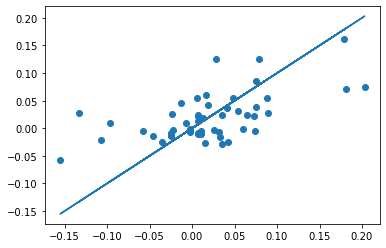

In [ ]:
# minimum variance portfolio using the factor-based covariance matrix
ones=np.ones([50,1])
X_minvarFactor=np.linalg.inv(Cov_F)@ ones/(ones.T @np.linalg.inv(Cov_F)@ ones)
# minimum variance portfolio using the unrestricted stock covariance matrix
Cov=Assets.cov()
X_minvar=np.linalg.inv(Cov)@ ones/(ones.T @np.linalg.inv(Cov)@ ones)

# plot the weights against each other
plt.plot(X_minvar,X_minvar)
plt.scatter(X_minvar,X_minvarFactor)



- What do you notice about the weights?
- How do we construct the returns of the strategy?
- What do we need to evaluate performance of the Factor-based approach vs the unrestricted approach?
   - Why can't we simply calculate Sharpe Ratios in the same data?

**Factor Bets**

* Can I allocate freely across factors?
  * for principals obviously yes, but the effect of a factor in your portfolio might not fully describe it's risk 
    * for example, you might be more likely to lose your job when the market is down, making you more averse to market risk then other risks
  * Active managers are often subject to factor exposure limits 


It is not obvious that maximizing your SR is the only guide for factor investing
Somebody has to bear the aggregate risk and the key question is whether you are the best holder of that risk

For example,
 * if your labor income is insensitive to recessions you might have comparative advantadge in taking market risk
 * you might be a bankruptcy lawyer--your income actually goes up when the market is down!
 * Managers with mediocre alpha, might not have better alternatives then harvest market risk-premium
 * Managers with "great" alpha will try to avoid it as factor investing reduces their overall SR making their portfolio riskier or less growth.


**Factor Hedging**

You might want to invest in factors even if they don't earn a risk-premium because they might be helpful in hedging. In this case, not having a risk-premium is a plus! 

It allow you to enhance your sharpe ratio even more than hedging factors with premia

This hedging can also come from non-portfolio factors--say your human capital is heavily specialized in tech and you might choose to short tech to have lower volatility in your overall networth.

A mutual fund manager might want to hedge portfolio flows--invest in factors that do well when investors flow out of their fund, for example--or a hedge fund manager might want to hedge funding conditions-- say invest in factors that do well when borrowing is harder.



**Factor Investing**


## A bond-equity strategic investment problem of an international investor


* we will assume here that the risk-premium is being generated from a constant distribution

* this is wrong, but for large well diversified portfolio not too bad

* under this assumption, our estimation problem amounts to using sample means

* ths risk-free rate is time-varying so we will have to deal with it


We start by loading out return data

In [ ]:
url="https://raw.githubusercontent.com/amoreira2/Lectures/main/assets/data/GlobalFinMonthly.csv"
Data = pd.read_csv(url,na_values=-99)
Data['Date']=pd.to_datetime(Data['Date'])
Data=Data.set_index(['Date'])
# the assets are the risk-free rate, the us equity market, the us bond market, the emerging market, the global equity market (without US), and the global bond market (without US)

Data=Data.rename(columns={Data.columns[1]: "MKTUS",Data.columns[2]: "BondUS",
                          Data.columns[3]: "EM",Data.columns[4]: "MKTxUS",Data.columns[5]: "BondxUS" })
Data.tail()

,RF,MKTUS,BondUS,EM,MKTxUS,BondxUS
Date,,,,,,
2016-08-31,0.0002,0.0052,-0.008417,0.025186,0.000838,-0.009552
2016-09-30,0.0002,0.0027,-0.016417,0.013153,0.012736,0.009979
2016-10-31,0.0002,-0.0200,-0.049460,0.002474,-0.020383,-0.043476
2016-11-30,0.0001,0.0487,-0.081636,-0.045971,-0.019798,-0.050359
2016-12-31,0.0003,0.0185,-0.005296,0.002904,0.034383,-0.023207


In [ ]:
# we start by constructing excess returns by subtracting the risk-free rate from the returns of the assets and we drop the risk-free rate column
Re=Data.subtract(Data['RF'],axis=0).drop(['RF'],axis=1)

# we compute the mean and covariance matrix of the excess returns
ERe=Re.mean()
print(ERe)
Cove=Re.cov()
print(Cove)



MKTUS      0.005140
BondUS     0.002523
EM         0.006923
MKTxUS     0.004149
BondxUS    0.002054
dtype: float64
            MKTUS    BondUS        EM    MKTxUS   BondxUS
MKTUS    0.001948  0.000111  0.001292  0.001264  0.000187
BondUS   0.000111  0.001227 -0.000204 -0.000013  0.000264
EM       0.001292 -0.000204  0.003556  0.001661  0.000249
MKTxUS   0.001264 -0.000013  0.001661  0.002182  0.000422
BondxUS  0.000187  0.000264  0.000249  0.000422  0.000407


Suppose I want to reconstruct my current estimates of Expected returns and the covariance matrix of returns ( and not excess returns), What do I do?

Simply add the current risk-free rate to you estimate of the expected return

In [ ]:
# set the risk-free rate to the current value of the 3-month T-bill rate divided by 12 to make it a monthly rate
rf=0.0525/12
# add to our estimate of risk-premiumns to get our estimate of expected returns

ER=ERe+rf

What about the covariance piece?

## Numerical solution

Lets start by solving

$ \max_X E[X'R_T]$ subject to $Var(X'R_T)\leq Vmax$

In [ ]:
# STEP 1: define the fucntion that computes the portfolio variance and expected returns given a vector of weights X (initially set to equal weights)

def portfolio_variance(X=np.ones(5)/5):
    return X @ Cove @ X

def portfolio_expected_return(X=np.ones(5)/5):
     return X @ ER

print(portfolio_variance())
print(portfolio_variance(np.array([0.5,0.5,0,0,0])))

print(portfolio_expected_return())
print(portfolio_expected_return(np.array([0.5,0.5,0,0,0])))

0.0007914039297139135
0.0008490361488465391
0.008532889760767246
0.00820649669319938


In [ ]:
# STEP 2: define the constraint functions, 

# here we will have one inequality for the portfolio variance , lets say a volatility of 10% per year. How do we translate this into a monthly variance?

# and one equality constraint for the weights to sum to one



Vmax=(0.2**2/12)
cons= ({'type': 'ineq',
          'fun' : lambda X: -portfolio_variance(X)+Vmax},
          {'type': 'eq',
          'fun' : lambda X: np.sum(X)-1})

# the constraint is normalized so that

#cons=({'type': 'ineq',
#          'fun' : lambda X: F(X)})

#means F(X)>=0

* Finally we are ready to do our minimization
* `options={'disp': True}`: tell python to report intermediary steps so we can check if the algorithm is doing progress towards a solution.
* There is a variety of additional parameters that you can pass to the minimizer. 
* see: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html


In [ ]:
# STEP 3: solve the minimization problem with constraints and save as `sol`
from scipy.optimize import minimize
X0=np.ones(5)/5
sol = minimize(lambda X: -portfolio_expected_return(X),X0, constraints=cons, options={'disp': True})

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.011929088527573371
            Iterations: 13
            Function evaluations: 78
            Gradient evaluations: 13


In [ ]:
#optimal weights
print(sol.x)
# optimal expected return at the annual frequency
print(portfolio_expected_return(sol.x)*12)
# optimal portfolio volatility at the annual frequenc
(portfolio_variance(sol.x)*12)**0.5

[ 0.65116149  0.38641724  0.83880728 -0.36993912 -0.50644688]
0.14314906233088046


0.20000201016577546

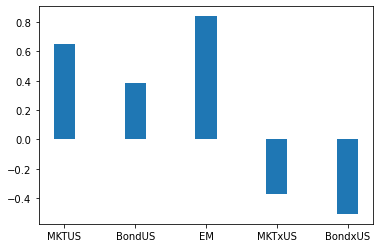

In [ ]:
# below I am plotting the solution weights.
width=0.3
fig, ax = plt.subplots()
index=np.arange(sol.x.shape[0])

ax.bar(index,sol.x,width)

ax.set_xticks(index)
ax.set_xticklabels(ER.index)
plt.show()

Here we assumed the portfolio has to be fully invested in risky assets.

There is no leverage (borrowing at the risk-free rate)

but there is shorting (raising additional funds by selling one asset)

Note that is X0+X1=1, if X0<0, then X1>1

 



## Introducing a benchmark

* in mutual funds there is often a benchmark, say the S&P 500 and the manager has a mandate to have a tracking error relative to the benchmark that is low enough, say $Tmax$

* and the manager is compensated only with respect to the returns above this benchmark

* tracking error is the volatility of the portfolio relative to the benchmark: $\sqrt{var(X'R_T-R^{benchmark}_T)}$

The manager problem is ro maximize benchmark adjusted returns subject to some tracking error constraint

$ \max_X E[X'R_T-R^{benchmark}_T]$ subject to $Var(X'R_T-R^{benchmark}_T)\leq Tmax$


Assuming benchmark is in set of traded assets, you car write 

$ \max_X E[X'R_T-1_b'R_T]$ subject to $Var(X'R_T-1_b'R_T)\leq Tmax$

Which can be written as


$ \max_X E[(X-1_b)'R_T]$ subject to $(X-1_b)'Var(R_T)(X-1_b)\leq Tmax$

In [ ]:

def portfolio_variance(X=np.ones(5)/5,Xbenchmark=np.array([0,0,0,0,0])):
    return (X -Xbenchmark)@ Cove @ (X-Xbenchmark)

def portfolio_expected_return(X=np.ones(5)/5,Xbenchmark=np.array([0,0,0,0,0])):
     return (X-Xbenchmark) @ ER


Xb=np.array([1,0,0,0,0])
Vmax=(0.2**2/12)
cons= ({'type': 'ineq',
          'fun' : lambda X: -portfolio_variance(X,Xbenchmark=Xb)+Vmax},
          {'type': 'eq',
          'fun' : lambda X: np.sum(X)-1})

X0=np.ones(5)/5
solb = minimize(lambda X: -portfolio_expected_return(X,Xbenchmark=Xb),X0, constraints=cons, options={'disp': True})


Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.005220575391068462
            Iterations: 15
            Function evaluations: 90
            Gradient evaluations: 15


In [ ]:
print(Cove.index)
#optimal weights no benchmark
print(sol.x)
#optimal weights with benchmark
print(solb.x)



Index(['MKTUS', 'BondUS', 'EM', 'MKTxUS', 'BondxUS'], dtype='object')
[ 0.65116149  0.38641724  0.83880728 -0.36993912 -0.50644688]
[ 1.71916096  0.06129325  0.73328686 -0.28549667 -1.2282444 ]


What happen here? Why the position in the market went up? Is that what you would expect?

In [ ]:
# optimal expected return at the annual frequency
print(portfolio_expected_return(solb.x)*12)
# portfolio volatility pf optimal portfolio at the annual frequency
print((portfolio_variance(solb.x)*12)**0.5)
#Trackign error
print((portfolio_variance(solb.x,Xbenchmark=Xb)*12)**0.5)
#Benchmark adjsuted returns
print((portfolio_expected_return(solb.x,Xbenchmark=Xb)*12))

## Information Ratio

Information ratio is how much you are expected to make in excess of the benchmark, divided by how much risk you are taking relative to the benchmark

$$InformationRatio=\frac{E[r_p-r_b]}{\sigma(r_p-r_p)}$$

In [ ]:
#The information ratio is the benchmark adjusted return divided by the tracking error
print((portfolio_expected_return(sol.x,Xbenchmark=Xb)*12)/(portfolio_variance(sol.x,Xbenchmark=Xb)*12)**0.5)

0.31322388844974003


Other things to do



Trace out how the optimal expected return varies as you change Vmax. In yearly volatility units try 6.5%, 7%, 8% , 10% ,15%,30%. Plot the resulting pairs in the scatter plot with the expected return in the y-axis and the volatility in the x-axis. What do you find?

Add the risk-free rate among the assets. There are different ways to do this. But a simple one is to change the expected return function  `X@ER+(1-np.sum(X))*rf`
* now X is the vector of risky assets only and (1-np.sum(X)) is whatever is the residual
* if this residual is positive you park in cash and earn rf
* if negative you borrow at the rf rate
* now your total weights mechanically add up to 1
* so you need to take out the equality constraint

Add a shorting constraint, say you can only short equities but not bonds, that is X>0 for certain assets

Add a leverage cap, so that the sum of your risky assets cannot exceed 1 too much, np.sum(X)-1 is called your leverage, so you can limit it to 1, so that for each dollar you have you borrow at most 1 dollar

Modify the expected return function to incorporate practical frictions in trading. For example, when you borrow you typically pay more than what you can invest at, there is a borrowing spread. Analogously if you short a stock, you have to pay an extra fee

## Analytical solution

The analytical solution assumes

- free borrowing and lending at risk-free rate
- Shorting without any shorting fees

The optimal weights are 

$$X=\sqrt{\frac{Vmax}{E[R^e]'Var(R^e)^{-1}E[R^e]}}Var(R^e)^{-1}E[R^e]$$

Where Vmax is in monthly variance units


Note that $\frac{Vmax}{E[R^e]'Var(R^e)^{-1}E[R^e]}$ is a number. Is basically a leverage factor. It leverage up (or down) the portfolio $Var(R^e)^{-1}E[R^e]$ so that the resulting portfolio has the desired target variance

This portfolio $Var(R^e)^{-1}E[R^e]$ is quite special because it has the highest Sharpe-ratio among all possible combinations of these assets





## Sharpe-ratio !

Sharpe ratio is probably the most used concept in money management, it comes in honor of William Sharpe ( the dude that discovered the CAPM). It reflects how much additional expected return you are getting per unit of volatility. Say you have a portfolio with expected returns $E[r_p]$

$$SharpeRatio=\frac{E[r_p]-rf}{\sigma(R_p)}$$


So a portfolio that has the highest sharpe ratio is nice because it is efficient. 

You take the minimum amount of risk that you need to take to achieve a expected return

or conversely you get the maximum possible expected return for a given level of risk that you are willing to take

_____

*Aside: Matrix inversion*

* You only need to understand how to operationaize it and in an conceptual level what it does

* But you don't need to follow all the mathematical details

* If you are interested. you can look in our linear algebra review in https://amoreira2.github.io/quantitativeinvesting/chapters/scientific/linear_algebra1.html

* I also provide a summary below

* Note that $(2)^{-1}=1/2=0.5$ (naturally!)

* $(Var(R^e))^{-1}$ is just like this 

* but more complicated because $Var(R^e)$ is a N by N matrix and we can't simply divide over to solve for X

* The definition of the inverse function is $f(x)=x^{-1}=y$ where $y*x=1$

* for matrices it is the same: $(Var(R^e))^{-1}Var(R^e)=I$, but now instead of 1, we have an identity matrix, which is a matrix with 1's in the diagonal and zero everywhere else


Thankfully we have a function in python that does just that




In [ ]:
# start with a 2 by 2 matrix
a=np.array([[3,7],[0,9]])
print(a)

# compute the inverse
ainv=np.linalg.inv(a) 

ainv

[[3 7]
 [0 9]]


array([[ 0.33333333, -0.25925926],
       [ 0.        ,  0.11111111]])

In [ ]:
# indeed ainv is the inverse of a because ainv @ a = I
ainv @ a

array([[1., 0.],
       [0., 1.]])

This portfolio is very special so it has many names

1. maximum sharpe ratio portfolio

2. mean-variance efficient portfolio (MVE)

3. Tangency portfolio

Names 1 and 2 are pretty clear. Name 3 will become clear later in the course

________________________
## **Finding the Mean-variance efficient portfolio**


First lets construct our vector of expected excess returns for our risky two assets US equity market and International equity market

In [ ]:
assets=['MKTUS','MKTxUS']
e=ERe[assets]

e

MKTUS     0.005140
MKTxUS    0.004149
dtype: float64

We start by estimating the covariance matrix from our data $Var(R^e)$

In [ ]:
c=Cove.loc[assets,assets]

c

,MKTUS,MKTxUS
MKTUS,0.001948,0.001264
MKTxUS,0.001264,0.002182


We then invert the covariance matrix $Var(R^e)^{-1}$

In [ ]:
cinv=np.linalg.inv(c) 

cinv

array([[ 822.50792137, -476.49212708],
       [-476.49212708,  734.40580739]])

we then use the dot product to cross-mulitply our vector of expected excess returns by the inverse of the covariance matrix

$$Var(R^e)^{-1}E[R^e]$$

In [ ]:
Wmve=cinv @ e
Wmve

array([2.25099751, 0.597729  ])

In [ ]:
Vmax=(0.2**2/12)
Wmve * (Vmax/(e @cinv @ e))**0.5

array([0.53401107, 0.14180109])

Things to try


Verify that indeed the entire class of portfolios that solve the problem for different variance targets Vmax are also MVE ( i.e they all have the max sharpe ratio)

What is the allocation to the risk-free rate? How do you find it? How does it change as you increase/decrease Vmax?


How does max SR change as you go from 
1. only investing in the US equity market
1. investing in US equities and US bonds
1. Invest everywhere except emerging markets
1. investing everywhere including emerging markets
1. investing only in global equities and global bonds

Compare the gains of investing domestically ( US equities and bonds)  with investing internationally as well (US equities, US bonds, Global equities, global bonds).

Why the SR is going up ?What properties of the returns moments the mean-variance optimizer are exploiting? 

Do we think those are reliable properties? What is the alternative?

For the four investment opportunity sets above, compute the optimal expected returns for the following volatilities 6.5%, 7%, 8% , 10% ,15%,30%. Plot the results in a scatter plot with volatility in the X-axis and expected returns in the y-axis. You should see 5 lines. Why they look like that?

Compare the benefits of a US investor to invest globally and the benefit of an international investor investing in the US ( ignore Emerging markets). Looking at individual assets risk-premiums and volatility explain the benefits of investing across multiple assets

**An Aside: Combining Factors and Alphas**

Suppose you also think of market exposure as purely investment thing. That is , all you care about is your final Sharpe Ratio.

How do you combine you alpha portfolio and your factor portfolio?


We learned than when assets are uncorrelated then 

$$W_i\sigma_{\epsilon,i}=w \frac{\alpha_i}{\sigma_{\epsilon,i}}=SR_i$$

Turns out that the market is uncorrelated with the the hedged portfolios! We build them that way.

So the market is also uncorrelated with our optimal combo!




In [ ]:
sr_mkt=df_ff6['Mkt-RF'].mean()/df_ff6['Mkt-RF'].std()*12**0.5
vol_mkt=df_ff6['Mkt-RF'].std()*12**0.5
vol_alpha=(W_alpha@Sigma_e@W_alpha*12)**0.5

sr_alpha/vol_alpha

Alpha_mkt=np.append(Alpha,df_ff6['Mkt-RF'].mean())
print(Alpha_mkt*12)
Sigma_mkt=np.block([[Sigma_e,np.zeros((5,1))],[np.zeros((1,5)),df_ff6['Mkt-RF'].var()]])
print((Sigma_mkt*12)**0.5)
Beta_mkt=np.append(Beta,1)
print(Beta_mkt)

[0.00565215 0.04340806 0.04082549 0.04305824 0.08436363 0.06964076]
[[0.10100102 0.         0.         0.         0.         0.        ]
 [0.         0.10153812 0.         0.         0.         0.        ]
 [0.         0.         0.07537267 0.         0.         0.        ]
 [0.         0.         0.         0.06688336 0.         0.        ]
 [0.         0.         0.         0.         0.14320141 0.        ]
 [0.         0.         0.         0.         0.         0.15513658]]
[ 0.20050922 -0.13683445 -0.09207115 -0.16721034 -0.15908574  1.        ]


**Shrinkage** is a very popular technique and also the lest ad-hoc of the different approaches so it work discussing a bit

The fundamental issue that the mean-variance problem does not deal with is that we are actually quite uncertain about the alphas, but the methods assumes complete certitude


In mathematical terms the MV problem assumes $A$ is a know constant when in fact it is more like a distribution:

$$A\sim N(\mu_{\alpha}I,\sigma^2_{\alpha}I)$$

where $\mu_{\alpha}$ is the expected value . Here we are focused on a manager only with long ideas. The short book is analogous

One could also write $$A\sim N(\mu_{\alpha}I,\sigma^2_{\alpha}1_{NxN})$$

Capturing the idea that there is co-movement in your alpha-judgment

Now his/her problem is (I will use the mean-variance problem case but the two other problems have similar solution)


$$ \max_W E[W'R^e_T]-\gamma Var(W'R^e_T)$$

$$ \max_W E[W'(A+Bf+U)]-\gamma Var(W'(A+Bf+U))$$

Here I will assume $E[f]=0$, so we can simply write the portfolio allocation problem of the **hedged portfolios**


$$ \max_W E[W'(A+U)]-\gamma Var(W'(A+U))$$

$$ \max_W E[W'A]-\gamma \left(WVar(A)W'+WVar(U)W'\right)$$

$$\max_W W'I\mu_{\alpha}-\gamma \left(WIW'\sigma^2_{\alpha}+W\Sigma_{\epsilon}W'\right)$$


The Optimality condition for this problem is


$$I\mu_{\alpha}-2\gamma \left(\sigma^2_{\alpha}+\Sigma_{\epsilon}\right)W'$$

Reorganizing

$$W=\frac{1}{2\gamma}\mu_{\alpha}\left(I\sigma^2_{\alpha}+\Sigma_{\epsilon}\right)^{-1}$$

In this case where there is no co-movement, the approach ignores alpha information of each idea (you use $\mu_{\alpha}$ for all) and you "noise up" the returns by $\sigma^2_{\alpha}$

In case of co-movement , then we have


$$W=\frac{1}{2\gamma}\mu_{\alpha}\left(1\sigma^2_{\alpha}+\Sigma_{\epsilon}\right)^{-1}$$




Why should you care about your portfolio risk?

- suppose you have 1M per year vol , what is the most money you expect to loose with 5% probability?

First lets assume it is normally distributed.

(we often will do that because make it easier to think, but you should always keep in mind that is an approximation)


$$Prob(r<X)=5\%$$

IT is convenient to transform into a stantard normal so we get a clean formula

$$Prob\left(\frac{r-E[r]}{std(r)}<\frac{X-E[r]}{std(r)}\right)=5\%$$

This is just the CDF of standard formal distribution. Let $F(x)=Prob(z<x)$ where $z\sim N(0,1)$


$$F\left(\frac{X-E[r]}{std(r)}\right)=5\%$$

Then we can use the inverse CDF, which is the quantile function

$$F^{−1}(p)=min\{x∣F(x)≥p\}$$

It gives use the lowest value x that is consistent with the probability being higher then a given value


$$\frac{X-E[r]}{std(r)}=F^{-1}(5\%)$$

Then 

$$X=F^{-1}(5\%)*std(r)+E[r]$$

In [ ]:
from scipy.stats import norm
x=0.05
norm.ppf(x)


-1.6448536269514729

First lets do the unhedged. 

In [ ]:
prob=0.05
mu=x*(beta*mu_f+alpha)*252
sig=x*(var_r*252)**0.5
norm.ppf(prob)*sig+mu

-0.8761656953451189

How do you interpret this value? 

It means that there is a 5% probability that you will lose more than 800 thousand dollars

Lets do the hedged

In [ ]:
prob=0.05
mu=xe*(alpha)*252
sig=xe*(var_e*252)**0.5
norm.ppf(prob)*sig+mu

-1.0443405970988286

Why are you risking a worse loss in the case of the hedged?

Lets suppose 

MVE theory


* We  learned that the portfolio that  has the highest sharpe ratio among the set of assets have the following form

$$ W^*=wVar(R^e)^{-1}E[R^e], \forall w>0$$

* I.e., the equation above defines $W^*$, the weights of the mean-variance efficient portfolio

* We can rewrite as
  
$$ Var(R^e)W^*=wE[R^e]$$

Note that the left term is really the covariance of the asset returns with the MVE portfolio $r^*=(W^*)'R^e$

$$Var(R^e)W^*=Cov(R^e,r^*)$$


* This means that the expected return of an asset must be proportional to the covariance between the return of the asset and the return of the mean-variance efficient portfolio

$$ E[R^e]= \frac{1}{w} Cov(R^e,r^*) $$


* This holds for all assets in your investment opportunity set (i.e. the assets included in the minimization problem that the mean-variance efficient portfolio solves)


* This means that for any assets $j$ and $i$ we have 


$$\frac{E[r^e_i]}{Cov(r^e_i,R^*)}= \frac{E[r^e_j]}{Cov(R^e_j,R^*)} $$ 


* All assets have the same expected return per-unit of covariance with the mean-variance efficient portoflio

* We can also apply this to the mean-variance efficient portfolio itself


$$ E[R^*]=1/w \times Cov(R^*,R^*) $$


* Which means that $1/w=\frac{E[R^*]}{Var(R^*)}$


* Plugging back in the original and we get that for any asset $j$


$$ E[r^e_j]=\frac{E[r^*]}{Var(r^*)} Cov(r^e_j,r^*) =\frac{Cov(r^e_j,r^*)}{Var(r^*)}E[r^*]=\beta_{j,*}E[r^*] $$


$$ E[r^e_j]=\beta_{j,*}E[r^*] $$


* All the information about the cross-sectional of expected returns--all the assets-- can be summarized by the expected return of the mean-variance efficient portfolio and the beta of each asset with respect to the mean-variance efficient portfolio

* Once you have the right definition of risk, the reward to risk is the same across assets (no free lunch)

* If you have alpha, then you get a "free lunch" 


>####  
>- Add random noise to signals (some fraction of vol.) to slightly distort rankings and recompute Sharpe.
>- How robust are slight perturbations in the cross-sectional rankings?
>- Calculate the Sharpe ratio for a strategy that always eliminates the top 2% long and short positions (which are most likely error prone).
>- Look at small perturbations ( say change horizon, skip a month)